In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
cv2.imshow('frame', X_train[np.random.randint(0, 59999)])
cv2.waitKey(0)
cv2.destroyAllWindows()

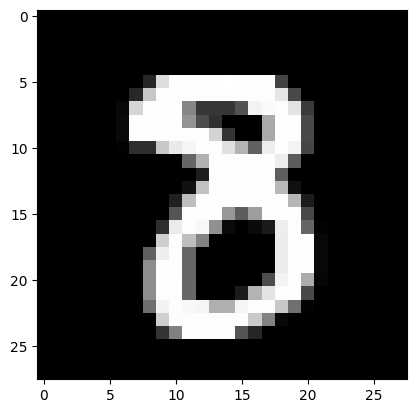

In [6]:
plt.imshow(X_train[np.random.randint(0, 59999)], cmap='gray')
plt.show()

### Forward Process

In [105]:
T = 200
IMG_SHAPE = (28, 28, 1)
betas = np.linspace(1e-4, 0.2, T, dtype=np.float32)

In [106]:
betas


array([9.99999975e-05, 1.10452261e-03, 2.10904516e-03, 3.11356783e-03,
       4.11809050e-03, 5.12261316e-03, 6.12713583e-03, 7.13165849e-03,
       8.13618116e-03, 9.14070383e-03, 1.01452265e-02, 1.11497492e-02,
       1.21542709e-02, 1.31587936e-02, 1.41633162e-02, 1.51678389e-02,
       1.61723625e-02, 1.71768852e-02, 1.81814078e-02, 1.91859305e-02,
       2.01904532e-02, 2.11949740e-02, 2.21994966e-02, 2.32040193e-02,
       2.42085420e-02, 2.52130646e-02, 2.62175873e-02, 2.72221100e-02,
       2.82266326e-02, 2.92311553e-02, 3.02356780e-02, 3.12402006e-02,
       3.22447233e-02, 3.32492478e-02, 3.42537686e-02, 3.52582932e-02,
       3.62628140e-02, 3.72673385e-02, 3.82718593e-02, 3.92763801e-02,
       4.02809046e-02, 4.12854254e-02, 4.22899500e-02, 4.32944708e-02,
       4.42989953e-02, 4.53035161e-02, 4.63080406e-02, 4.73125614e-02,
       4.83170860e-02, 4.93216068e-02, 5.03261313e-02, 5.13306521e-02,
       5.23351766e-02, 5.33396974e-02, 5.43442219e-02, 5.53487428e-02,
      

In [107]:
alphas = 1 - betas
alphas

array([0.9999    , 0.99889547, 0.99789095, 0.99688643, 0.9958819 ,
       0.9948774 , 0.9938729 , 0.99286836, 0.99186385, 0.99085927,
       0.98985475, 0.98885024, 0.9878457 , 0.9868412 , 0.9858367 ,
       0.98483217, 0.98382765, 0.98282313, 0.9818186 , 0.9808141 ,
       0.9798095 , 0.978805  , 0.9778005 , 0.976796  , 0.97579145,
       0.97478694, 0.9737824 , 0.9727779 , 0.9717734 , 0.97076887,
       0.96976435, 0.9687598 , 0.96775526, 0.96675074, 0.9657462 ,
       0.9647417 , 0.9637372 , 0.9627327 , 0.96172816, 0.96072364,
       0.9597191 , 0.9587146 , 0.95771   , 0.9567055 , 0.955701  ,
       0.9546965 , 0.95369196, 0.95268744, 0.9516829 , 0.9506784 ,
       0.9496739 , 0.9486694 , 0.9476648 , 0.9466603 , 0.94565576,
       0.94465125, 0.9436467 , 0.9426422 , 0.9416377 , 0.9406332 ,
       0.93962866, 0.93862414, 0.93761957, 0.93661505, 0.93561053,
       0.934606  , 0.9336015 , 0.932597  , 0.93159246, 0.93058795,
       0.92958343, 0.9285789 , 0.9275744 , 0.9265698 , 0.92556

In [108]:
alpha_cumprod = np.cumprod(alphas)
alpha_cumprod

array([9.99899983e-01, 9.98795569e-01, 9.96689081e-01, 9.93585825e-01,
       9.89494145e-01, 9.84425366e-01, 9.78393674e-01, 9.71416116e-01,
       9.63512540e-01, 9.54705358e-01, 9.45019662e-01, 9.34482932e-01,
       9.23124969e-01, 9.10977781e-01, 8.98075342e-01, 8.84453475e-01,
       8.70149791e-01, 8.55203331e-01, 8.39654565e-01, 8.23545039e-01,
       8.06917250e-01, 7.89814651e-01, 7.72281170e-01, 7.54361153e-01,
       7.36099184e-01, 7.17539847e-01, 6.98727667e-01, 6.79706812e-01,
       6.60520971e-01, 6.41213179e-01, 6.21825695e-01, 6.02399707e-01,
       5.82975507e-01, 5.63592017e-01, 5.44286847e-01, 5.25096238e-01,
       5.06054759e-01, 4.87195462e-01, 4.68549579e-01, 4.50146645e-01,
       4.32014346e-01, 4.14178461e-01, 3.96662861e-01, 3.79489541e-01,
       3.62678528e-01, 3.46247911e-01, 3.30213845e-01, 3.14590573e-01,
       2.99390465e-01, 2.84624040e-01, 2.70300031e-01, 2.56425351e-01,
       2.43005276e-01, 2.30043441e-01, 2.17541903e-01, 2.05501229e-01,
      

In [109]:
noise = tf.random.normal(X_train[0].shape)

In [110]:
def forward(x0, t):
    print(x0.shape)
    # noise = tf.random.normal(x0.shape)
    # print(noise)

    # print(tf.gather(alpha_cumprod, t))
    a_bar = alpha_cumprod[t]
    a_bar = tf.convert_to_tensor(a_bar)


    out = tf.sqrt(a_bar) * x0 + tf.sqrt(1 - a_bar) * noise
    print(out)
    return out

forward(X_train[0], 5)

(28, 28)
tf.Tensor(
[[-3.92422229e-02  2.13787258e-01  2.56155819e-01 -5.18289357e-02
  -9.37563479e-02  1.68886423e-01  1.85485289e-01  9.84186679e-02
  -4.12081271e-01 -2.72698969e-01  4.02655900e-02 -2.20277891e-01
   1.12882882e-01  6.30889535e-02  9.35197622e-02  2.34175958e-02
   9.60246101e-02  4.45783846e-02  4.60153446e-02  5.37829548e-02
  -1.12663321e-01  7.88489506e-02  5.25490940e-02 -7.26697519e-02
   3.95797752e-02  1.54013813e-01  2.85566933e-02 -6.05999939e-02]
 [ 1.61036998e-01 -6.30608499e-02 -6.09431043e-03 -1.58855945e-01
   3.51024009e-02  1.32098198e-01 -2.30599076e-01 -1.08641505e-01
   2.68005133e-02  8.17067698e-02  6.76864162e-02 -9.18104276e-02
  -8.39389861e-02 -1.11961797e-01  9.57369804e-02 -8.83824453e-02
   1.26178786e-01  1.98119320e-02 -1.30862951e-01 -2.90509552e-01
   1.07081808e-01  7.13718235e-02 -1.82092026e-01 -4.49310392e-02
   1.95986796e-02 -1.36807226e-02 -1.28137484e-01 -8.15657824e-02]
 [-1.87123530e-02 -9.16544795e-02  1.39036193e-01  1.6

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[-3.92422229e-02,  2.13787258e-01,  2.56155819e-01,
        -5.18289357e-02, -9.37563479e-02,  1.68886423e-01,
         1.85485289e-01,  9.84186679e-02, -4.12081271e-01,
        -2.72698969e-01,  4.02655900e-02, -2.20277891e-01,
         1.12882882e-01,  6.30889535e-02,  9.35197622e-02,
         2.34175958e-02,  9.60246101e-02,  4.45783846e-02,
         4.60153446e-02,  5.37829548e-02, -1.12663321e-01,
         7.88489506e-02,  5.25490940e-02, -7.26697519e-02,
         3.95797752e-02,  1.54013813e-01,  2.85566933e-02,
        -6.05999939e-02],
       [ 1.61036998e-01, -6.30608499e-02, -6.09431043e-03,
        -1.58855945e-01,  3.51024009e-02,  1.32098198e-01,
        -2.30599076e-01, -1.08641505e-01,  2.68005133e-02,
         8.17067698e-02,  6.76864162e-02, -9.18104276e-02,
        -8.39389861e-02, -1.11961797e-01,  9.57369804e-02,
        -8.83824453e-02,  1.26178786e-01,  1.98119320e-02,
        -1.30862951e-01, -2.90509552e-0

In [111]:
def q_sample(x0, t):
    """
    x0: clean image tensor, shape (batch_size, 28, 28, 1), values in [-1, 1]
    t: tensor of shape (batch_size,) with timesteps in [0, T)
    """
    batch_size = tf.shape(x0)[0]
    

    a_bar = tf.gather(alpha_cumprod, t)
    a_bar = tf.reshape(a_bar, (batch_size, 1, 1, 1))

    return tf.sqrt(a_bar) * x0 + tf.sqrt(1.0 - a_bar) * noise


q_sample([X_train[0]], 5)


<tf.Tensor: shape=(1, 1, 28, 28), dtype=float32, numpy=
array([[[[-3.92422229e-02,  2.13787258e-01,  2.56155819e-01,
          -5.18289357e-02, -9.37563479e-02,  1.68886423e-01,
           1.85485289e-01,  9.84186679e-02, -4.12081271e-01,
          -2.72698969e-01,  4.02655900e-02, -2.20277891e-01,
           1.12882882e-01,  6.30889535e-02,  9.35197622e-02,
           2.34175958e-02,  9.60246101e-02,  4.45783846e-02,
           4.60153446e-02,  5.37829548e-02, -1.12663321e-01,
           7.88489506e-02,  5.25490940e-02, -7.26697519e-02,
           3.95797752e-02,  1.54013813e-01,  2.85566933e-02,
          -6.05999939e-02],
         [ 1.61036998e-01, -6.30608499e-02, -6.09431043e-03,
          -1.58855945e-01,  3.51024009e-02,  1.32098198e-01,
          -2.30599076e-01, -1.08641505e-01,  2.68005133e-02,
           8.17067698e-02,  6.76864162e-02, -9.18104276e-02,
          -8.39389861e-02, -1.11961797e-01,  9.57369804e-02,
          -8.83824453e-02,  1.26178786e-01,  1.98119320e-02,
 

(1, 1, 28, 28)


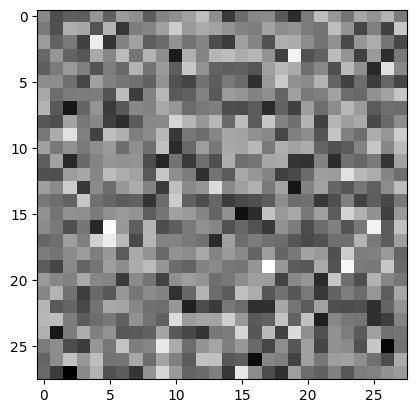

In [112]:
def forward(x0, t):
    noise = tf.random.normal(x0.shape)
    a_bar = alpha_cumprod[t]
    a_bar = tf.convert_to_tensor(a_bar)

    # we must add channel and batch dimension - channel is required in Conv2D layers
    a_bar = tf.reshape(a_bar, (1, 1, 1, 1))

    out = tf.sqrt(a_bar) * x0 + tf.sqrt(1 - a_bar) * noise

    return out

noisy_img = forward(X_train[0], 199)
print(noisy_img.shape)



plt.imshow(tf.squeeze(noisy_img[0]), cmap='gray')
plt.show()

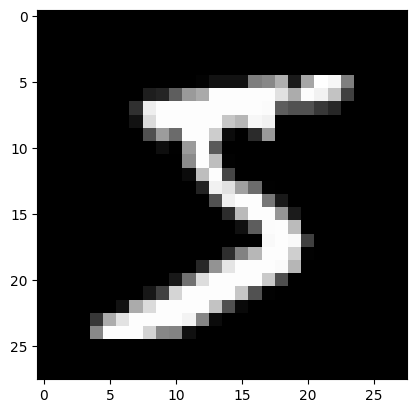

In [113]:
plt.imshow(X_train[0], cmap='gray')

In [114]:
imgs = []
for i in range(10):
    imgs.append(tf.squeeze(forward(X_train[0], i*20)))

imgs = np.array(imgs)

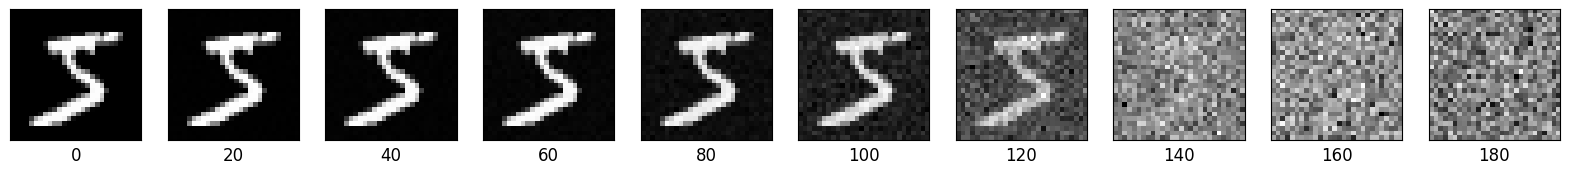

In [92]:
plt.figure(figsize=(20, 20))
for i in range(len(imgs)):
    plt.subplot(1, imgs.shape[0], i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.xticks([])  #hide
    plt.yticks([])  
    plt.xlabel(str(i*20), fontsize=12)

    
plt.show()